# Sentiment Analysis
**Instructions**:
1. Wherever you are asked to code, insert a text block below your code block and explain what you have coded as per your own understanding.
2. If the code is provided by us, execute it, and add below a text block and provide your explanation in your own words.
3. Submit both the .ipynb and pdf files to canvas.
4. **The similarity score should be less than 15%.**
5. **This will be the bonus ICE and the score will be added to the overall percentage.**

# Task 1 (15 points)
Run the below code blocks in tutorial 1 without any errors. Write down your observations in detail for each code block.

#Tutorial-1: Sentiment Analysis on movie reviews

Sentiment analysis is a natural language processing technique that involves analyzing text to determine the emotional tone or subjective opinion of the writer. It is also known as opinion mining or emotion AI.

Sentiment analysis can be performed on a variety of text data, including customer reviews, social media posts, news articles, and more. It uses machine learning algorithms to classify the text as positive, negative, or neutral, or to assign a numerical sentiment score on a scale. It can provide valuable insights into the attitudes and opinions of a target audience, and help businesses and organizations make data-driven decisions.

This code provides a simple example of how to perform sentiment analysis on text data using scikit-learn's pipeline functionality. This performs analysis on a dataset of phrases from movie reviews. The sentiment labels for each phrase are integers ranging from 0 to 4, with 0 being the most negative and 4 being the most positive.

For running the tutorial, you will need the dataset present in this link provided.

https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here, we are using the transformers library which is used for performing nltk pretrained models which is trained with the huge dataset such as text classification, topic of the content, sentiment analysis, question answering  etc.

In conclude, here we are installing the transformer library which is we use foir getting access of the pretrained models.



In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

from collections import Counter

from nltk.sentiment import SentimentAnalyzer
from nltk.classify import NaiveBayesClassifier

import tensorflow as tf

from keras.callbacks import EarlyStopping, ModelCheckpoint

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

import transformers
import torch

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os

Here, we are importing the libraries for performing the sentiment analysis using natural language processing and machine learning approach.

here pandas and numpy library which is used for data manipulation and analysis panda is reading the data files while numpy is used for performing the statistical calculations.

after that we are using the sklearn library to use the machine learning algorithms here we are using the vectorizers for converting the categorical data into the numerical labels and also fetching the models such as random forest and adaboost and evaluation metrix such as accuracy score and confusion matrix.
now we are importing the library tensorflow which is use for building and training the neural netrwork models.

gensim library which is used for training the word embedding for instance word2vec.

transformer and torch library is used for working with the pretrained model for instance BERT.

the seaborn and matplotlib libraries are used for the visulizing the data.

at the bottom we are importing the warning library which is used for prevention of the warnings.


in conclude, we are importing all the libraries which is we are going to use for the sentiment analysis.


In [ ]:
df = pd.read_csv("/content/train.tsv", sep='\t', index_col="PhraseId")
pd.set_option('display.max_colwidth', None)
df.head(2)

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
2,1,A series of escapades demonstrating the adage that what is good for the goose,2


Here, we are reading the csv  file using the pandas library.and  also display 2 data rows and columns from the csv file.


first we are creating the variable df  after that we are providing the function to read the file which is pd.read_csv which is pd is the alias of the pandas library and read_csv is the function of the pandas library for reading the csv file and in this we are passing the 3 different parameter first is the path of the file and second is the sep='\t' which is the parameter for columns use the tab as the delimeter and after that we are passsing the parameter index_col="ParseId" which is specifies that index columns.

after that we are using the fucntion pd.set_option('display.max_colwidth', None) which is used for the remove the width from the columns so that when we call the df.head it properly fit in the window.

at the last we are doing df.head(2) which is usede for display 2 rows data from the dataframe.




In [ ]:
train, test = train_test_split(df[["Phrase", "Sentiment"]], random_state=0)
X_train = train.Phrase
X_test = test.Phrase
y_train = train.Sentiment
y_test = test.Sentiment

Here, we are spliting the dataframe into the training and testing data uisng the train_test_split() method.

first we are spliting the data randomly using the train_test_split() function. we are passing the parameters first is the dataframe object df in the df we are passing two parameter which is phrase and sentiment which is the two columns of the dataframe. after that we are passing the parameter for random_state=0 which is use for make sure the split is reproducible every time when its run.

now , we are parting th dataframe data pharse and sentiments. where in  X_train and X_test we are giving the train.pharases columns and y_train and y_test which is we are providing the sentiment column of the dataframe.

here this all the variables is used for the train the model and also evaluate the model.


In [ ]:
def get_accuracy():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return round(accuracy_score(y_pred, y_test),3)

here we are fiting the model using the X_train and y_train the data for that we are using the fit() method.

first we are usign the get_accuracy() method for training the model this method will calculate and return the accuracy score of the model.

 after that we are using the fit() method for training the model in the fit() method we are passing the two parameters which are X_trainn and y_train dataframes.

after that we are getting the predicted values based on the actual values where y_pred is the variable in this we are passing the pipeline and predict() method in this method we are passing the parameter X_test which is predict the value based on the actual values.

at the last we are returning the function round which is used for rounding the accuracy score. here we are passing the two parameters which are y_pred and y_test and set 3 as the 3 decimals.

all in all, we are training the model and predicting the values using the fit() and predict() method.





# Baseline models

these code blocks demonstrate how to build and evaluate a text classification pipeline using scikit-learn, as well as how to customize the pipeline using different vectorizers and tokenizers.







We'll build them through simple steps:

encoding each sentence through basic methods such as bag of words and tf-idf.
using classic trees ensembles that use bagging and boosting, respectively.
ignoring the sentence Id.
ignoring in some cases the less frequent words.

## Random Forest, BOW, TF-IDF

In [ ]:
count_vectorizer = CountVectorizer(max_features=1000)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=10)

**Random forest**
Random forest is an method of ensemble learning method which is use for the classification and regressions. here we are constructing the multiple decision trees to give the output to make more accurate the predictions. here tree is trained using the different subset of the dataframe and random subset is use to split the tree. the result is more stable so that there is no cause as a overfittings.
**BOW**
Bow stands for bag-of-words. which is used for convert the documents into the vector of the words frequencies. here we are counting the frequencies of the each word and stored into the vector. here the main thing is order of the token is not matter its only stored the words tokens.
**TF-IDF**
TF-IDF stands for term frequency- inverse document frequency which is text represent method which is shown the importance of the word into the collection of the documents. the frequency of the word in the documents name as the term frequency while frequency of the word in the corpus is the inverse document frequency.
 here,  we are using the two objects count vectorizer and random forest.


 countervectorizer is used for text processing which is use for convert the text into the matrix of the token counts. and we are passing the parameter which is max_features which is specifies the maximum number of the features. here its set 1000 which means that 1000 frequent words will be use in the matrix.

 random forest is the object of the random forest ckassifier which is used for the learning method that construct the collection of the decision tree and at the last combines to predict and improve the accuracy score of the model.max_depth is use for the maximum depth of the decision tree. n_estomators is the parameter for number of the trees.

overall here we are creating the two object for the differend kind of approach.countervedctor for counting the frequency and convert them into the matrix and random forest for train the model.








In [ ]:
pipe = make_pipeline(count_vectorizer,random_forest)

Here, we are creating the pipeline for the countervectorizer and random forest which is used for the text preprocessing and train the random forest model on the result features.



In [ ]:
get_accuracy()

0.516

Here, we are using the get_accuracy() method for calculating the accuracy score by using the fitting pipeline to training the data, and for predicting the labels and also compare the results with the actual labels.



Let's look at the percentages of the classes in the true labels and in the predictions.

In [ ]:
y_pred = pipe.predict(X_test)

Here, we are predicting the labels using the predict() method in this method we are using the pipeline for predict the labels and we are storing the predicted labels into the y_pred. here we are doing to check the performance of the model using the unseen data while training the model and comparing the predicted lables into the actual lables.



In [ ]:
round(pd.Series(y_train).value_counts(normalize=True),2)

2    0.51
3    0.21
1    0.17
4    0.06
0    0.04
Name: Sentiment, dtype: float64

here we are creating the pandas series, which is use the y_train data and value_counts.

here we are creating the pandas series which is frequency of the each of the unique values in the y_train. here we are using the value_count() method for counting the occurance of the each unique value in y_train and passed parameter normalize=true is specifies the counts of the proportions. here we are round up the result by 2 decimal using the round() function.




In [ ]:
round(pd.Series(y_pred).value_counts(normalize=True),2)

2    0.99
3    0.01
1    0.00
4    0.00
0    0.00
dtype: float64

here we are creating the pandas series, which is use the y_train data and value_counts.

here we are creating the pandas series which is frequency of the each of the unique values in the y_train. here we are using the value_count() method for counting the occurance of the each unique value in y_train and passed parameter normalize=true is specifies the counts of the proportions. here we are round up the result by 2 decimal using the round() function.

As we can see, Decision Trees in their basic configuration are not a good model for unbalanced data! In almost every node, the biggest category has the majority and that's what the model predicts for almost every row. The accuracy then is aproximately the percentage of the biggest category: 0.5.

Let's add now weights.

In [ ]:
random_forest.set_params(class_weight = 'balanced')
print(get_accuracy())
random_forest.set_params(class_weight = 'balanced_subsample')
print(get_accuracy())

0.437
0.462


here, we are tuning the hyperparameters of the random forest model by changing the value of the class weight balanced and balanced subsample. and evaluating the accuracy of the data.

class weight is the parameter of the classification where the classes are balanced which means that one class is more or less then other classes.

after that we are using  the class weight 'balanced sub sample'  which means  that here we are using the subset of the samples for each tree. here its use the way to improve the performance of the minoroty class.

All in all, using the random forest model and using the balanced and balanced subsamples data we are calculating the accuracy score of the model.


















Surprisingly or not, when using as weights the inverse of the classes proportion, the accuracy gets worst.

Through the confusion matrix we can see that the model is still predicting too much 2, although now the complexity increased.

<ipython-input-15-cd42ade1a659>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+ labels)
<ipython-input-15-cd42ade1a659>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+ labels)


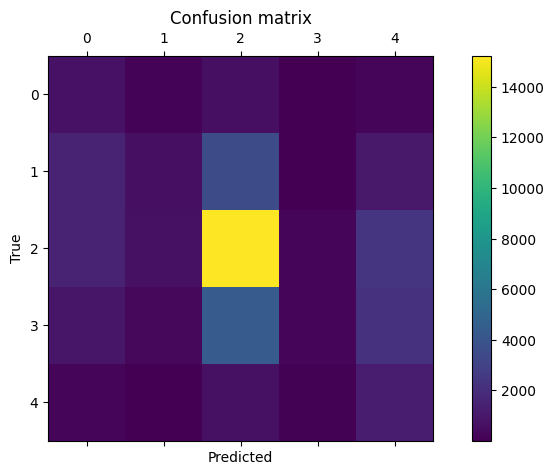

In [ ]:
labels = [i for i in range(5)]
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_yticklabels(['']+ labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

here,we are creating the confusion matrix for evaluating the performance of the model using the test dataset.

first we are using the predict() method with parameter as a test set and predicte the  labels which is training the model.

after that we are creating the confusion metrics by comparing the predicted label with the actual labels. the matrix which is shows the number of true positive, true negative, false positive,false negative of the each class.its also represent the how many classes are misclassified and how many classification errors are in the model.


after that we are using the matplotlib for making the confusion matrix . we are creating the figure, adding the subplot and use matshow to display the confusion matrix as a colourful grids.

at the last we are displaying the plot.show(). this will shows the performance of the model and visualize the perfomance using the confusion matrix.


We'll try also adding lemmatization and replacing the BOW with tf-idf.

In [ ]:
#taken from sklearn webpage
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

here, we are importing the nltk library for using the statistical methods and from the nltk we are importing the word_tokenize.

after that we are importing the nltk.stem library and from this we are dimporting the wordlemmatizer which is use for the lemmatize the words in the documents.

lemmatization is reducing the words into their base and root form, which is use to normalize the text data and improve the performance of the model.

here _init_ method is use as the wordlemmatizer object and _Call_ method use for the lemmatize the tokens from the documents here we are using the word_Tokenize for spliting the words in to the tokens.here the lemmatize method is perform in each word to convert the word into the base and root form.

here we are customize the tokenizer use in the place of the default tokenizer in different nlp operations using the python libraries.




In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
pipe[0].set_params(tokenizer=LemmaTokenizer())
get_accuracy()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.477

here, we are majorly calculating the accuracy score of the model.

first, we are importing the nltk library which is natural language toolkit which is use for performing the statistical methods.

after that we are downloading the punkt for punctuations and also wordnet for processed the data.

here we are using the machine learning pipeline where we are using the customize tokenizer name as a wordlemmatizer for processed the text data before its trained in the model.

 after that we are calculating the accuracy score of the model using the get_accuracy() method.

in conclude, here we are using the machine learning pipeline that use the custom tokenizer for processed the data and now we are training the model and calculating the accuracy of the model.







In [ ]:
tfidf_vectorizer = TfidfVectorizer()
pipe.steps[0] = ('vectorizer', tfidf_vectorizer)
get_accuracy()

0.462

Here, we are using the tfidf vectorizer  using the machine learning pipeline.

first we are using the tfidf vectorization which is use for convert the text documents intot he matrics of the numerical features which is going to be used as the input into the model.

after that we are using the pipe.steps[0] which is the pipeline of the tfidf vectorizer, which is replacing any of the previous steps that is define. tfidfvectorizer() function will create and instance of the tfidfvectorizer.

here tfidfvectorizer is to use for the calculate the importance of the each word from the text  by calculating the term frequency-inverse document frequency score.

here at the last we are calculating the accuracy score of the model using the train and evaluation of the model using the tfdif returns data.


That is, still poor results. We'll try with boosting.

#Tutorial-2: Basic sentiment analysis using text blob

TextBlob is a Python library that provides a simple API for common natural language processing (NLP) tasks, including sentiment analysis. Sentiment analysis is the process of determining whether a piece of text expresses positive, negative, or neutral sentiment.

In order to perform sentiment analysis with TextBlob, you can create a TextBlob object from a string of text, and then use the sentiment property to get a sentiment polarity score and a subjectivity score. The polarity score ranges from -1 (negative sentiment) to 1 (positive sentiment), with 0 indicating neutral sentiment. The subjectivity score ranges from 0 (objective) to 1 (subjective), representing how much the text expresses an opinion or personal feeling.

In [ ]:
from textblob import TextBlob

here. we are importing the textblob library which is used for the performing the sentiment analysis on the text based data.




In [ ]:
tweet="I am happy"
analysis = TextBlob(tweet)
if analysis.sentiment.polarity > 0:
  print('positive')
elif analysis.sentiment.polarity == 0:
  print('neutral')
else:
  print('negative')

positive


Here, we are using the textblob library for perform the sentiment analysis on the given tweets.
first we are creating the object of the textblob and passing the parameter as a tweets.
after that we are using the sentiment polarity of the sentiment where polarity > 0 then its positive and if polarity ==0 then its neutral else negative.

here in this code sentence is "I m happy" so sentiment polarity is positive so the output return as a "positive".



#Translation in Python

Translation in Python refers to the process of converting text from one language to another using programming tools and techniques.

One popular library for performing translation in Python is the translate module. This library provides a simple interface for translating text using various translation services, such as Google Translate, Microsoft Translator, and Yandex.Translate.

In [ ]:
pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


we are installing the translate library using the "!pip install translate" which is used for the translating the text using the different kind of the translation engines.



In [ ]:
from translate import Translator

translator = Translator(from_lang="spanish", to_lang="english")
translation = translator.translate("Hola. ¿Cómo estás?")
print(translation)


Hello dear sponsor, how are you?


here, we are translating the spanish text into the english text using the translator.
for that we are first importing the translator which is the  translator engines for translating text.
after that we are creating the object of the translator and we are providing two parameter first is the from_lang="spanish" which is represent in which language sentence is right now and another one is the to_lang="english" which represent that in which langauge we want to translate.

after specifying the from and to languages, now we are calling the translate() method from the translator and for that in this method we are passing the sentence of the spenish which is now perform the translating task and convert the sentence into the english.and stored the translated text into the variable translation.

at the last we are printing the translated text using the print() with variable translation.






# Task 2 (25 points)

Write a Python program to perform sentiment analysis on the given spanish text below. You can either use a pre-trained spanish sentiment analysis model or implement your own. Your program should output the overall sentiment of the text as well as the sentiment of each sentence individually

In [ ]:
spanish_text = "Anoche tuve una experiencia increíble en el restaurante. La comida era deliciosa y el servicio fue impecable. Nuestro camarero fue muy amable y atento, e hizo excelentes recomendaciones del menú. El ambiente del restaurante también era maravilloso, con una bonita decoración y un ambiente acogedor. En general, recomendaría encarecidamente este restaurante a cualquiera que busque una experiencia gastronómica fantástica."

here, we are passing the spanish text into one variable called as spanish_text.this text we will use for performing the sentiment analysis model.

In [ ]:
!pip install googletrans==4.0.0-rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17413 sha256=8dcaa0abd230d54e0b685496db97060707e0f492fff779023f8969203a22bcec
  Stored in directory: /root/.cache/pip/wheels/60/b3/27/d8aff3e2d5c2d0d97a117cdf0d5f13cd121e2c2b5fb49b55a0
Successfully built googletrans

Here, we are installing the library "!pip install googletrans==4.0.0-rc1" here we are specifying the version also which is used for the translating the text with dufferent languages using the google translate APIs.



In [ ]:
from textblob import TextBlob
from googletrans import Translator

# The given Spanish text
spanish_text = "Anoche tuve una experiencia increíble en el restaurante. La comida era deliciosa y el servicio fue impecable. Nuestro camarero fue muy amable y atento, e hizo excelentes recomendaciones del menú. El ambiente del restaurante también era maravilloso, con una bonita decoración y un ambiente acogedor. En general, recomendaría encarecidamente este restaurante a cualquiera que busque una experiencia gastronómica fantástica."

# Create a translator object
translator = Translator()

# Translate the text to English
english_text = translator.translate(spanish_text, dest='en').text

# Create a TextBlob object for the Spanish text
spanish_blob = TextBlob(spanish_text)

# Get the sentiment of the Spanish text
spanish_polarity = spanish_blob.sentiment.polarity

# Create a TextBlob object for the English text
english_blob = TextBlob(english_text)

# Get the sentiment of the English text
english_polarity = english_blob.sentiment.polarity

# Print the overall sentiment of the Spanish text and the English text
print("Overall sentiment of the Spanish text:", "positive" if spanish_polarity > 0 else "negative" if spanish_polarity < 0 else "neutral")
print("Overall sentiment of the English text:", "positive" if english_polarity > 0 else "negative" if english_polarity < 0 else "neutral")

# Get the sentiment of each sentence and classify it as positive, negative, or neutral
sentiment_by_sentence = {}
for sentence in spanish_blob.sentences:
    sentence_polarity = sentence.sentiment.polarity
    if sentence_polarity > 0:
        sentiment_by_sentence[str(sentence)] = 'positive'
    elif sentence_polarity < 0:
        sentiment_by_sentence[str(sentence)] = 'negative'
    else:
        sentiment_by_sentence[str(sentence)] = 'neutral'

# Print the sentiment of each sentence in the Spanish text
print("Sentiment by sentence in the Spanish text:")
for sentence, sentiment in sentiment_by_sentence.items():
    print(sentence, ":", sentiment)

# Get the sentiment of each sentence and classify it as positive, negative, or neutral
sentiment_by_sentence = {}
for sentence in english_blob.sentences:
    sentence_polarity = sentence.sentiment.polarity
    if sentence_polarity > 0:
        sentiment_by_sentence[str(sentence)] = 'positive'
    elif sentence_polarity < 0:
        sentiment_by_sentence[str(sentence)] = 'negative'
    else:
        sentiment_by_sentence[str(sentence)] = 'neutral'

# Print the sentiment of each sentence in the English text
print(" ")
print("Sentiment by sentence in the English text:")
for sentence, sentiment in sentiment_by_sentence.items():
    print(sentence, ":", sentiment)


Overall sentiment of the Spanish text: positive
Overall sentiment of the English text: positive
Sentiment by sentence in the Spanish text:
Anoche tuve una experiencia increíble en el restaurante. : neutral
La comida era deliciosa y el servicio fue impecable. : neutral
Nuestro camarero fue muy amable y atento, e hizo excelentes recomendaciones del menú. : neutral
El ambiente del restaurante también era maravilloso, con una bonita decoración y un ambiente acogedor. : neutral
En general, recomendaría encarecidamente este restaurante a cualquiera que busque una experiencia gastronómica fantástica. : positive
 
Sentiment by sentence in the English text:
Last night I had an incredible experience in the restaurant.The food was delicious and the service was impeccable.Our waiter was very friendly and attentive, and made excellent recommendations of the menu.The restaurant atmosphere was also wonderful, with a beautiful decoration and a cozy atmosphere.In general, I would strongly recommend thi

her we are using the two different libraries for the natural language processing textblob and googletrans for performing the sentiment analysis on the provided spanish text.

first we are creating the translator object form the googletrans to translate the spenish text into the english.

here we are using the textblob for performing the translation on the spanish text on the original spanish text and also translate the english text.

and we print the overall sentiment of the text, along with the sentiment of the each sentence in the each text. here we classify text into theree different parts which is positive, negative and neutral.

the main aim is here to see the use of textblob library and googletrans libraries for performing the sentiment analysison spanish text.which is going to useful for reading and understanding the sentiment of the social media posts, customer reviews.




In [ ]:
!pip install flair


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

here, we are installing the "!pip install flair" library which is used for the natural language processing task sentiment analysis. here we are using this for use the pre-trained model and function of the nlp.



In [ ]:

from flair.models import TextClassifier
from flair.data import Sentence

# Load the pre-trained sentiment analysis model
classifier = TextClassifier.load('sentiment')

# Spanish text to analyze
spanish_text = "Anoche tuve una experiencia increíble en el restaurante. La comida era deliciosa y el servicio fue impecable. Nuestro camarero fue muy amable y atento, e hizo excelentes recomendaciones del menú. El ambiente del restaurante también era maravilloso, con una bonita decoración y un ambiente acogedor. En general, recomendaría encarecidamente este restaurante a cualquiera que busque una experiencia gastronómica fantástica."

# Split the text into sentences
sentences = spanish_text.split('.')

# Analyze the sentiment of each sentence
for i, sentence in enumerate(sentences):
    # Create a Sentence object for each sentence
    s = Sentence(sentence.strip())

    # Predict the sentiment label for the sentence
    classifier.predict(s)

    # Get the sentiment value (positive, negative, or neutral)
    if s.labels:
        sentiment_value = s.labels[0].value
    else:
        sentiment_value = "NO SENTIMENT"

    # Print the sentiment of the sentence
    print(f"Sentence {i+1} sentiment is {sentiment_value}")

# Predict the overall sentiment of the text
s = Sentence(spanish_text)
classifier.predict(s)
if s.labels:
    overall_sentiment = s.labels[0].value
else:
    overall_sentiment = "NO SENTIMENT"
print(f"Overall sentiment of the text is {overall_sentiment}")


2023-04-11 21:19:54,728 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp6ze5ukry


100%|██████████| 253M/253M [00:15<00:00, 16.9MB/s]


2023-04-11 21:20:10,920 copying /tmp/tmp6ze5ukry to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt
2023-04-11 21:20:11,543 removing temp file /tmp/tmp6ze5ukry


Sentence 1 sentiment is NEGATIVE
Sentence 2 sentiment is POSITIVE
Sentence 3 sentiment is POSITIVE
Sentence 4 sentiment is POSITIVE
Sentence 5 sentiment is POSITIVE
2023-04-11 21:20:16,240 Warning: An empty Sentence was created! Are there empty strings in your dataset?
Sentence 6 sentiment is NO SENTIMENT
Overall sentiment of the text is POSITIVE


Here, we are performing sentiment analysis on the spanish text using the flair library.

first we are importing the library flair which is the used for performing the sentiment analysis we are using the pre-trained sentiment analysis models from this library.here we are first loading the pre-trained model for sentiment analysis model.

here, after choosing the model we are spliting the dataset into the each sentences. here we analayze the sentiment of the each sentence using the model and print classify results as a positive, negative and neutral for each of the sentences.


Here, we are predicting the sentiment of the text by by analyzing the text and print the sentiment labels. here its analyze the sentiment of the spanish text.






#Task 3: sentiment analysis using the Naive Bayes algorithm

The Naive Bayes algorithm is a probabilistic algorithm that uses Bayes' theorem to calculate the probability of a given text belonging to a particular sentiment class. The below article explains how to build a Naive Bayes classifier for sentiment analysis using a labeled dataset of movie reviews.

Tutorial: https://www.enjoyalgorithms.com/blog/sentiment-analysis-using-naive-bayes

Referring the above tutorial provided,

What are the advantages and limitations of using the Naive Bayes algorithm for sentiment analysis? How might you address some of the limitations? **(10 Points)**


**Answer:**
**Sentiment Analysis :**
Sentiment analysis is the process of identifying the tones of the sentecne which is positive, negative and neutral. its perform in the text data. This approach is used for analysing the data of customer reviews,social media comments and emails.

**Naive Bayes Algorithm:**
Naive Bayes Algorithm is the probabilistic classifier.its dependent on the probability of the model that gives the independence assumpations. that assumptions does't have any reality that's why its called as a naive.


**Advantages of use the Naive Bayes algorithm for sentiment analysis:**
1.simplicity:
Naive bayes is the simple algorithm which is easy to implement and required less training data to trained the model.

2.speed: naive bayes is fast algorithm which is trained on the huge datasets faster.

3.Robustness: naive bayes is the powerful algorithm which work well with the noisy and incomplete the data.

4.high accuracy: whether its simple , naive bayes is gaining high accuracy on the sentiment analysis.



**Limitations of use the Naive Bayes algorithm for sentiment analysis:**
Assumptions of independence:
naive bayes assumes that all the features here are independent, which is not true un every case in nlp tasks.
lACK of context: naive bayes is not use the context of the text to analyze. so sometimes its misclassified.
limited expressiveness: naive bayes is use the linear decision boundries, which is the limitize the ability to capture the complax relation between the features.

**To address some of these limitations, the below steps can be taken:**
Feature engineering: here for selection of the features and engineering them we need to carefully use it for reduce the effect of the idependent assumptions.

Ensemble methods: here we need to use ensamle methods bagging and boosting  which is going to help to improve the expressiveness of the model for combining multiple weak models and make one strong model.

contextual analysis: here we are incorporating with the surrounding words and phrases which is help to improve the accuracy of the model.








#Task 4: (10 Points)

How does the Boolean feature selection technique used in the Boolean Multinomial Naive Bayes algorithm differ from other feature selection techniques in text classification, such as frequency-based selection, and how does it impact the performance of the algorithm?

**Answer:**

**Feature Selection**
Feature selection is the process of the reducing the number of the input variable while making the prediction of the model.
** Boolean feature selection technique**
this is technique which is use in the machine learning to select the subset of the variables and features which are most relatable to the problem. its select based on the boolean or binary values, which are either 0 or 1 based on the whether this features is present or the absent.

**Boolean Multinomial Naive Bayes algorithm**
this is the variation of the naive bayes algorithm which is used for text classification. this is specially use for the boolean and binary data and feature, where each feature is classify as the present or absent in the text.
here all the features are independent to each others and give the class labels. this is calculate the feature of the each class and use the probability to predict the classes for the new documents.

Talking about the feature selections:
**Boolean feature selection:**
this technique is used for the selecting the boolean multinomial naive bayes algorithm and its different from frequency based selection  here its only consider whether its present or absent for the particularly features in text, rather than its frequency.

uin boolean feature selection, here we vector the feature of the document which is consists of the binary values which are representing whether each feature is present or not in the document. its used for the frequency of the features of the document which is not provide much information about the related classifications.

**Frequency-based selection:**
in this selection we are consider the frequency of the occurance of the each feature in the text, and also select the features based on the frequency. this is useful technique when the frequency of the features provide is realiable information about the related to the classification.



Talking about the impact of the feature selection on the performance of the boolean multinomial naive bayes algorithm based on the specific classification and chracteristics of the dataset. in short, frequency based selection may be perform better than boolean feature selection when its the frequency of the feature is information for the classification.while, if the frequency of the feature is not provide more information, boolean feature selection may be perform better by reduce the number of the not related features in the model. at the last, the choice of the feature selection is based on the experimentation and evaluation on the specific task and data.



#Task 5: Sentiment Analysis & Opinion Mining with Python and NLTK

The tutorial covers the basics of sentiment analysis and opinion mining, and provides a step-by-step guide to implementing a sentiment analysis system using Python and the Natural Language Toolkit (NLTK) library. The tutorial also introduces different techniques for feature extraction, including bag-of-words, n-grams, and word embeddings.

Tutorial: https://pub.towardsai.net/sentiment-analysis-opinion-mining-with-python-nlp-tutorial-d1f173ca4e3c

Implement all the code blocks in the above tutorial and provide your explanation in your own words.**(10 Points)**

# **Dataset extractions:**

In [ ]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/sentiment_analysis_tutorial/women_clothing_review.csv

--2023-04-11 21:21:58--  https://raw.githubusercontent.com/towardsai/tutorials/master/sentiment_analysis_tutorial/women_clothing_review.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8480236 (8.1M) [text/plain]
Saving to: ‘women_clothing_review.csv’

women_clothing_revi 100%[===================>]   8.09M  --.-KB/s    in 0.06s   

2023-04-11 21:21:58 (141 MB/s) - ‘women_clothing_review.csv’ saved [8480236/8480236]



here, we are downloading the dataset of women clothing reviews.here we are downloading the csv file. this dataset is the collection of the women clothing reviews for performing the sentiment analysis.

# **Import libraries:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


here. we are importing the all libraries for performing the sentiment analysis.
first we are importing the pandas library which is used for data reading and data visualizations.after that we are using the numpy for calculating the statistical calculations.
here we are also using the natural language toolkit for processing the sentiment analysis task. for that we are using the tensorflow for developed the model and evaluate.

overall, we are here importing all the libraries which is needed for developing the model and evaluation for performing the sentiment analysis.

# **Show Dataset Values:**

In [ ]:
df = pd.read_csv('women_clothing_review.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


here, we are using the pandas to read the file women_Clothing_reviews.csv and also using the df.head() we are displaying the data. df is the object of the pandas read csv()  function.

# **Dropping unused columns:**

In [ ]:
df = df.drop(['Title', 'Positive Feedback Count', 'Unnamed: 0', ], axis=1)
df.dropna(inplace=True)

here, we are dropping some unused columns from the dataframe. here we are creating the obejct of the dataframe and drop() function we are passing the columns name in to the drop() function along with the axis=1.

here its remove the rows with the missing values from the dataframe 'df' in the place, it means the main dataframe is changes and drop NAN values and dropped from the dataframe.


# **Calculating the polarity:**

In [ ]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating
0,767,33,Absolutely wonderful - silky and sexy and comfortable,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,General,Dresses,Dresses,Positive
2,1077,60,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,General,Tops,Blouses,Positive


here ,we are creating the new columns name as the polarity rating in the exisitng dataframe using the lambda function for assign the value for the 'positive' to rows with rating >3, 'neutral' for the rows with the rating =3 and for 'negative' the rating < 3. here its handled by the sentiment polarity for the (positice, negative, neutral) for doing further analysis.




# **plot diagram for rating visualization:**

<Axes: xlabel='Rating', ylabel='count'>

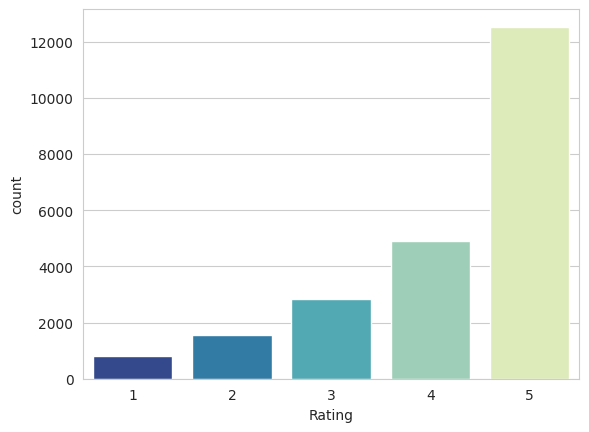

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=df, palette='YlGnBu_r')

here, we are ploting the diagram using the seaborn libraries.here we are setting the plotting style 'whitegrid' using the set_style() function. after that we are creating the count plot  using the countplot function for display the distribution of the rating values in the dataframe using the greed and blue colors palattes.here we are using the palatte as a 'YlGnBu_r'.




# **plot diagram for rating count:**

<Axes: xlabel='Polarity_Rating', ylabel='count'>

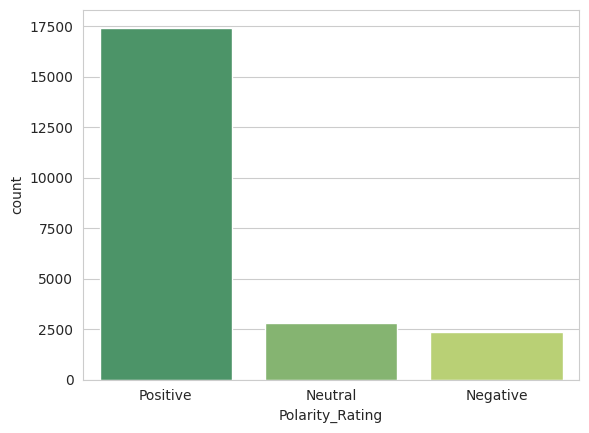

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

Here, we are using the plotting style as the 'whitegrid' using the set_Style() function from the seaborn library. now we are creating the count plot using the countplot  function to display the distribution of the polarity rating values in the dataframe which is assign based on the previus steps depends on the rating values using the summer as color palatte.



# **Data preprocessing:**

In [ ]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

here, we are creating the three different kind of the dataframes as a positive,negative and neutral by filtering the dataframe based on the polarity rating columns. here the df_positive contains the first 8000 rows with the positive polarity while the df_neutral with the neutral polarity rating and for 'df_negative' here negative polarity rating is used. this is handled by the seperate the reviews based on the polarity rating for the sentiment analysis traning and testing the classification model.




# **merging the sample of the negative and neutral polarity and creating the new dataframe:**

In [ ]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

Here, we are doing oversampling of the minority classes in the dataset for balanced the distribution of the each classes. we are randomly sampling the 8000 data points with the neutral and negative classes to match with the positive classes. at the last we are concating all the dataframes into one dataframe.

here, we are doing this for address classes imbalance, which is occured when one class has few sample than the others. classes imblanced will be make biased model performance, where the model got the higher accuracy for the large amount of the classes but performance is poorly on the some small classes. by doing oversampling the small portion of the classes, we are now creating the balanced dataset and its improve the model performance of the classes.



# **Text preprocessing:**

In [ ]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

Here, we are defining the function called get_text_processing which takes the text string as input.
this function removes the all punctuations from the text using the string. also do the tokenization where its tokenize the string into the words and remove the stopwords using the stopwords.words function.
the main aim of this is to preprocess text data for easy to make model to analyze it. removing the stopwords and punctuation will help to reduce the noise from the text and focus in the important part of the data.




# **Now Apply the method "get_text_processing" into column review text:**

In [ ]:
df['review'] = df['Review Text'].apply(get_text_processing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity_Rating,review
0,767,33,Absolutely wonderful - silky and sexy and comfortable,4,1,Initmates,Intimate,Intimates,Positive,Absolutely wonderful silky sexy comfortable
1,1080,34,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,General,Dresses,Dresses,Positive,Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite
3,1049,50,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
4,847,47,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,General,Tops,Blouses,Positive,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt
6,858,39,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants 3 skirts waas trying kept oops


here, we are creating the new column in the existing dataframe called review by applying the get_text_processing function to the values in the review text column. here apply() method we will use to each row in the columns.

here we are preprocess the text data into the review text column by removing the punctuations and stopwords and stored them into the processed text in the new column review. this is easy to analyze the data in the dataframe.




# **Visualize Text Review with Polarity Rating**

In [ ]:
df = df[['review', 'Polarity_Rating']]
df.head()

,review,Polarity_Rating
0,Absolutely wonderful silky sexy comfortable,Positive
1,Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite,Positive
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments,Positive
4,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt,Positive
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants 3 skirts waas trying kept oops,Positive


here, we are visualizing the data of the two different columns review and polarity_rating.
first line here is for selecting the columns review and polarity_rating from the dataframe. the second line of the code is display the first few rows of the dataframe.



# **Apply One hot encoding on negative, neutral, and positive:**

In [ ]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
0,Absolutely wonderful silky sexy comfortable,0,0,1
1,Love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite 58 love length hits little knee would definitely true midi someone truly petite,0,0,1
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments,0,0,1
4,shirt flattering due adjustable front tie perfect length wear leggings sleeveless pairs well cardigan love shirt,0,0,1
6,aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turns mathced everythiing trying prefectly little baggy hte xs hte msallet size bummer petite decided jkeep though said matvehd everything ejans pants 3 skirts waas trying kept oops,0,0,1


here, first we are creating one-hot encoded its represent of the polarity_rating columns in the dataframe. in the second line we are droping the lines of the polarity_rating columns from the original dataframe.

after that we are concatenating the one-hot encoded to represent of the polarity_rating with the original dataframes and here we are assigning the result into the dataframe.

here we are convert the categorical variable polarity_rating into the numerical values which can be use as input for the models. here one-hot encoding creates the binary columns for the each unique value in the categorical variable,with the value of 1 in the column and indicate the present of that value in the original data.




# **Spliting the data:**

In [ ]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

here,we are spliting the data using the train_test_split() function.

first we are selecting x where we select the review column from the dataframe and extracting the values. while, for y we are droping the review columns data and taking input as a other columns values.

after that we are spliting the data into the X_train, X_test, y_train, y_test using the train_test_split() function. here we are passing some parameter into this such as  x which is have the values of the review columns data and y which is have other columns values rather then review values. after that we are providing the spliting percentage for train and test, where the train set is containing the 70% of the data while the testing set contains the 30% of the data. additionally, we are passing the last parameter which is random_state=42 which is represent that we are spliting the data based on the random manner.




# **Apply vectorization:**

In [ ]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

here we are creating the instance of the countervectorizer() which is used for convert the categorical data into the numberical matrics.
for that first we are creating the instance of the countervectorizer() and after that we are trying to fiting the data intot the X_train using the fit_transform() which is used for converting the data into the sparse matrix representing the word count in the each review and assign the results into the X_train variable.

the last line represent that here we are using the transform() method to convert the data into the sparse matrix and represent the word counts and we store this values into the X_test variable.

the main aim is to doing this is to convert the categorical data into the numerical sparse matrix represent the word count and frequency of the words which are going to use as input for the train the model.







# **Apply frequency, inverse document frequency::**

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

Tf-Idf - term frewuency- inverse document frequency.
here,first we are creating the instance of the tfidftransformer() and assign the variable into the tfidf.
after that we are uisng the fit_transform() methof with the x_train data which is convert the data into the sparse matrix represent of the term frequency-inverse document frequency in the each words in each reviews and assign the values into the X_train.

after that we are using the transform method for the testing data X_test into the sparse matrix representation of the tf-idf score. and here we are cinverting the training and testing the data into the dense array using the toarray method.

here we are performing normalize the words counts in the each reviews by taking into the account of the frequency of the each word across the all reviews. and here were reducing the effect of the common words which are appear in the many reviews and are less useful for sentiment analysis. here tf-idf features is used for the input in the model for training.




# **Add different layers:**

In [ ]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

here, we are using the sequential neural network model using the keras library. here there are four dense layers with Relu activation function and dropout regularization for solving issue of the overfitting.

now we are using the output layer with the three units and a softmax activation function for predicting the probability of the each sentiment labels. after that we are using the adam optimizer with the learning rate of 0.001 and set the loss function to categorical cross entropy and metrix accuracy.

here after that we are calling the callback method to early stopping and for monitor the loss of the validation during the training and callback will stop if the performance of the model will not improve  for two epochs, its required for preventing to overfitting and reduce the training time.

here we are compiling the model using the parameters first is loss function value is used as categorical crossentropy, second is optimizer with opt values and last is the matrics with value as the accuracy.

at the last weare doing early stopping process with passing the  parameters which are monitor with the value is val_loss and second is mode with min value and verbose set as 1 and last patience with 2.


# **Fit the model:**

In [ ]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
66/66 [==============================] - 390s 6s/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.3808 - val_accuracy: 0.9314
Epoch 2/100
66/66 [==============================] - 379s 6s/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.3985 - val_accuracy: 0.9318
Epoch 3/100
66/66 [==============================] - 385s 6s/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.4197 - val_accuracy: 0.9299
Epoch 3: early stopping


here,we are training the model using the fit() method.
we are first using the instance of the model and use fit() method with the parameters which are x for x_train , y for y_train, batch size of 256,  epochs are set 100 and validation data is passes as x_test and y_test as well as verbose as 1 and callsback is set as the early stop for preventing the overfitting the model and reducing the training timing.

the main aim is to train the neural network model using  the training data and evaluate the performance using the validation data and we are using the callback function also to stop the modle if the models epochs 2 and its not improving the performance of the model.



# **Evaluation the model:**

In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

113/113 [==============================] - 46s 408ms/step - loss: 0.4197 - accuracy: 0.9299
Test accuracy: 0.9298611283302307


Here, we are evaluating the model using the testing dataset.
first we are creating the instance of the model named variable as the model_score.

after that we are using the evaluate method in this method we are passing the parameters which are X_test, y_test, batch size as 64 and verbose as 1.

and the last we are printing the test accuracy and passing the model_Score as 1.

here we are evaluating the performance of the trained neural network model using the testing data and here we are giving the accuracy score, which is here defines the predicted labels using the sentiment labels for all the testing examples.



# **prediction:**

In [ ]:
preds = model.predict(X_test)
preds

225/225 [==============================] - 54s 239ms/step


array([[1.2932129e-11, 7.8521641e-11, 9.9999994e-01],
       [9.9999970e-01, 4.5962678e-09, 1.8270124e-07],
       [9.9999982e-01, 6.3653616e-09, 7.3791803e-08],
       ...,
       [9.9999815e-01, 1.4736141e-08, 1.8470030e-06],
       [2.3108317e-09, 2.5500330e-10, 9.9999994e-01],
       [1.9690034e-09, 1.7569791e-09, 9.9999994e-01]], dtype=float32)

here, we are predicting the labels using the actual labels.

for that we are using the instance of the model along with the predict() method and in this method we are passing the parameter x_test and storing the labels in to the preds variable. and at the last we are returning the variable preds.

here its use for generating the predictiong of the sentiment labels using the testing data using the neural network model, which is used for the further analysis and evaluating the model performance.



#Task 6: (20 Points)

Write a Python function that takes in a list of sentences and uses the NLTK library to perform sentiment analysis on each sentence.

In [ ]:
#Your code here
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def analyze_sentiments(sentences):
    sid = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        sentiment_scores = sid.polarity_scores(sentence)
        sentiment_score = sentiment_scores['compound']
        if sentiment_score > 0.05:
            sentiment_label = 'Positive'
        elif sentiment_score < -0.05:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
        results.append((sentence, sentiment_score, sentiment_label))
    return results
sentences = [    "I love going to the beach on a sunny day",    "The traffic is terrible during rush hour",    "I can't stand the taste of broccoli",    "I had a great time at the party last night",    "The movie was really boring and slow-paced"]

results = analyze_sentiments(sentences)

for sentence, score, label in results:
    print(f"{sentence}: {label}")


I love going to the beach on a sunny day: Positive
The traffic is terrible during rush hour: Negative
I can't stand the taste of broccoli: Neutral
I had a great time at the party last night: Positive
The movie was really boring and slow-paced: Negative


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


here, we are using the nltk for performing the sentiment analysis.

first, we are nltk library as well as the sentimentintensity analyzer which is used for performing the sentiment analysis task.

here we are defining the function named analyze sentiments which takes a list of the sentences as a input and use this into vader sentiment analysis for  analyze the emotions of the each sentence.

here this function is to calculate the score of the each sentence using the compound scored  which is provide by vader, and here its assign the sentiment labels such as positive, negative, neutral based on the score value.

here this function is return the list of the tuples, where each tuple contains the original sentence  and its sentiment score and sentiment labels.

here we are now defining the  list of example sentences and calls tje analyze sentiments  function on the list to generate the list of the sentiments analysis results.

at the last we are iterating the over the sentiment analysis results and prints each of the sentences along with the assigned labels. this process is handle by analyze sentiment function used ot perform sentiment analysis on the list of the sentences and assign the sentiment labels to each one.




#Task 7 (10 points)

How do different sentiment analysis lexicons compare in terms of their agreement on the polarity of words, and what factors contribute to disagreements between lexicons

**Answer:**
There are different kind of sentiment analysis lexicons available, and performance of the model and polarity agreement  of the words can be different. talking about the agreement between the lexicons which is be affected by  different kind of factors, including the data which is use to creare the lexicons, here the corpus of the text will be use for evaluate the model, and method will be use to annotate the sentiment of the words, and the intention use for the lexicon.

talking about the general terms lexicons are  based on the larger and more diverse corpus of the text which is use for perform better and have higher agreement with other lexicons. for instance, lexicons are based on the general domain corpus text, which are sentiwordnet and wordnet lexicons, which is use for the intention of the high agreement with other lexicons.


in contrast, lexicons are created for specific domain, for instance product reviews or social media, which may have lower agreement with other type of the lexicons. This is befcause of the sentiment of the words which are vary depending on the context and the domain which are they used. for instance, the word such as "like" and "not goog" may be get the positive connotation in the some contexts but a negative connotation in others.

In addition, this method is use for annotate the sentiment of the words whihc affect the agreement between lexicons. for instance, here some of the lexicons rely on human annotators to give the labels of the sentiment words, on the other hand use the automated methods. lexicons based on the human annotators which is may have higher agreement with other lexicons, but they are also be  more subjective and biased towards the annotators for personal preferences.


all in all, the agreement between sentiment analysis lexicons which are dependent on the several  factors, which include the data used for create the lexicon, here the corpus of the text used to evaluate the model and method which is used for annotate the sentiment of the words, and the emotions of the text is use for the lexicon. therefore, its essential to evaluate and compare the performance of the various sentiment analysis lexicons before choosing one for the specific application.



